# Complementary of FCM

**Project Title: Complementary of FCM**

**Project Overview:**

This project involves the completion of Fuzzy C-Means (FCM) based on the following tasks:

**Project Start Contact**: Mr. Javad Saghi  
Contact Email: jav.saghi@gmail.com

**Project Importance**: This project contributes 2 points out of a total of 20.

**Enhancements for Improvement**:
- Clarify the specific objectives and outcomes expected from completing the FCM project.
- Provide a clear timeline and milestones for project completion.
- Ensure regular communication and feedback loops with Mr. Javad Saghi to address any issues promptly.


## Introduction of FCM
FCM (Fuzzy C-Means) is a form of Fuzzy clustering.
The difference between fuzzy clustering and non-fuzzy clustering is that, in fuzzy clustering, each data point can belong to more than one cluster.


## Loss Function
If we consider our loss function as:
$$ \mathcal{L} = \sum_{j=1}^{C}{\sum_{i=1}^{n}{U_{ij}^m }\| x_i - \mu_j \|^2} \\
s.t. \sum_{j=1}^{C}{U_{ij}} = 1  \hspace{10pt}  \forall i $$

where $C$ is the number of clusters, $n$ is the number of data points, $U_{ij}$ is the degree of membership of point $x_i$ in cluster $j$, $m$ is an hyperparameter, $x_i$ is a data point and $\mu_j$ is the center of cluster $j$. 

To solve this problem we use lagrange multipliers method, the lagrangian function is defined as:

$$ \mathcal{L} = \sum_{j=1}^{C}{\sum_{i=1}^{n}{U_{ij}^m }\| x_i - \mu_j \|^2} - \left(\sum_{i=1}^{n}{\lambda_i \left(\sum_{j=1}^{C}{U_{ij}}-1\right)}\right)$$

By setting its derivative with respect to the $\mu_j$ equal to 0, we have:

$$ \frac{\partial \mathcal{L}}{\partial \mu_j} = 0 \\
\Rightarrow \sum_{i=1}^{n}{-2U_{ij}^{m}(x_i - \mu_j )} - 0 = 0 \\
\Rightarrow \sum_{i=1}^{n}{U_{ij}^{m}x_i} - \sum_{i=1}^{n}{U_{ij}^{m}\mu_j} = 0 \\
\Rightarrow \boxed{\mu_j = \frac{\sum_{i=1}^{n}{U_{ij}^{m}x_i}}{\sum_{i=1}^{n}{U_{ij}^{m}}}}
$$

By setting its derivative with respect to the $U_{ij}$ equal to 0, we have:

$$ \frac{\partial \mathcal{L}}{\partial U_{ij}} = 0 \\
\Rightarrow mU_{ij}^{m-1}\|x_i - \mu_j \| - \lambda_i = 0 \\
\Rightarrow U_{ij} = \left(\frac{\lambda_i}{m\|x_i - \mu_j \|^2}\right) ^ {\frac{1}{m-1}}
$$

We know that $\sum_{j=1}^{C}{U_{ij}} = 1$, so:

$$ 
\left. \begin{matrix} 
U_{ij} = \left(\frac{\lambda_i}{m\|x_i - \mu_j \|^2}\right)^{\frac{1}{m-1}} \\
\sum_{j=1}^{C}{U_{ij}} = 1
\end{matrix} \right\}
\Rightarrow \sum_{j=1}^{C}{\left(\frac{\lambda_i}{m\|x_i - \mu_j \|^2}\right)^{\frac{1}{m-1}}} = 1 \\
\Rightarrow \lambda_i^{\frac{1}{m-1}} = \frac{1}{\sum_{j=1}^{C}{\frac{1}{\left(m\|x_i - \mu_j \|^2\right)^{\frac{1}{m-1}}}}} 
$$

By renaming summation index to k, we have:
$$
\lambda_i^{\frac{1}{m-1}} = \frac{1}{\sum_{k=1}^{C}{\frac{1}{\left(m\|x_i - \mu_k \|^2\right)^{\frac{1}{m-1}}}}} 
$$

$$
\left. \begin{matrix} 
U_{ij} = \left(\frac{\lambda_i}{m\|x_i - \mu_j \|^2}\right)^{\frac{1}{m-1}} \\
\lambda_i^{\frac{1}{m-1}} = \frac{1}{\sum_{k=1}^{C}{\frac{1}{\left(m\|x_i - \mu_k \|^2\right)^{\frac{1}{m-1}}}}} 
\end{matrix} \right\}
\Rightarrow 
U_{ij} = \frac{\frac{1}{\sum_{k=1}^{C}{\frac{1}{\left(m\|x_i - \mu_k \|^2\right)^{\frac{1}{m-1}}}}}}{\left(m\|x_i - \mu_j \|^2\right)^\frac{1}{m-1}} $$

$$
\Rightarrow \boxed{U_{ij} = \frac{1}{\sum_{k=1}^{C}{ \frac{\left(m\|x_i - \mu_j \|^2\right)^{\frac{1}{m-1}}}{\left(m\|x_i - \mu_k \|^2\right)^{\frac{1}{m-1}}} }}}
$$


## Summary of the algorithm
1. choose the number of clusters $C$ and the fuzziness hyperparameter $m$.
1. initialize membership matrix $U$ with random values such that $\sum_{j=1}^{C}{U_{ij}}=1 \hspace{5px} \forall i$.
1. update cluster centers $\mu_j$ using following formula: $$ \mu_j = \frac{\sum_{i=1}^{n}{U_{ij}^{m}x_i}}{\sum_{i=1}^{n}{U_{ij}^{m}}} $$ 
1. update membership degrees $U_{ij}$ using following formula: $$ U_{ij} = \frac{1}{\sum_{k=1}^{C}{ \frac{\left(m\|x_i - \mu_j \|^2\right)^{\frac{1}{m-1}}}{\left(m\|x_i - \mu_k \|^2\right)^{\frac{1}{m-1}}} }} $$
1. repeat two updating steps until changes in parameters are below a specific threshold or the number of iteration limits is reached.


## Python code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from sklearn.datasets import make_classification
from matplotlib.colors import to_rgba
from PIL import Image


### A constant problem
choose the number of clusters $C$ and the fuzziness hyperparameter $m$.

In [2]:
# Set hyperparameters
n_sample = 50
n_cluster = 4
m = 2


In [3]:
markers = [MarkerStyle('o'),
           MarkerStyle('P'),
           MarkerStyle('s'),
           MarkerStyle('D'),
           MarkerStyle('X'),
           MarkerStyle('p'),
           MarkerStyle('v'),
           MarkerStyle('^')][:n_cluster]

colors = [to_rgba('tab:blue'),
            to_rgba('tab:red'),
            to_rgba('tab:green'),
            to_rgba('tab:brown'),
            to_rgba('tab:cyan'),
            to_rgba('tab:olive'),
            to_rgba('tab:orange'),
            to_rgba('tab:pink'),
            to_rgba('tab:purple')][:n_cluster]

colors = np.array(colors)

# Make simple classification dataset
dataset_x, dataset_y = make_classification(n_samples=n_sample,
                                           n_features=2,
                                           n_informative=2,
                                           n_redundant=0,
                                           n_classes=n_cluster,
                                           n_clusters_per_class=1,
                                           class_sep=2.0)




### Init
initialize membership matrix $U$ with random values such that $\sum_{j=1}^{C}{U_{ij}}=1 \hspace{5px} \forall i$.

In [4]:
# Initialize mu
mu_arr = np.zeros([n_cluster, 2])
mu_list = []

# Initialize U matrix with random values
U_arr = np.random.uniform(0, 1, [n_sample, n_cluster])
U_arr = (U_arr.T / np.sum(U_arr, axis=1)).T
U_list = []



### Convergence criteria
Update cluster centers $\mu_j$ and membership degrees $U_{ij}$ until changes in parameters are below a specific threshold or the number of iteration limits is reached.

In [5]:
old_U_arr = U_arr + 1e5
ite = 0
images = []

# While membership degree U changes significantly do...
while (np.max(np.abs(old_U_arr - U_arr)) > 0.001 and  ite < 40):
    ite = ite + 1
    old_U_arr = np.copy(U_arr)

    # Compute mu points
    for j in range(n_cluster):
        temp1 = np.sum((U_arr[:, j] ** m).reshape([-1, 1]).repeat(2, axis=1) * dataset_x, axis=0)
        temp2 = np.sum((U_arr[:, j] ** m), axis=0)
        mu_arr[j] = temp1 / temp2

    # Compute U for each point and for each cluster
    for j in range(n_cluster):
        for i in range(n_sample):
            temp2 = [(m * np.linalg.norm(dataset_x[i] - mu_arr[k]) ** 2) ** (1 / (m-1)) for k in range(n_cluster)]
            temp2 = np.array(temp2)
            temp1 = temp2[j]
            temp3 = temp1 / temp2
            U_arr[i, j] = 1 / np.sum(temp3, axis=0)

    # Appand scatter plots to a list for GIF file
    fig1, axs1 = plt.subplots(1, 1)
    sample_color = U_arr @ colors
    sample_color[sample_color > 1.0] = 1.0
    sample_color[sample_color < 0.0] = 0.0
    sample_color[:, 3] = 0.7

    temp_marker = MarkerStyle('o', fillstyle='none')
    axs1.scatter(dataset_x[:, 0], dataset_x[:, 1], marker=temp_marker, color=sample_color, s=80, linewidths=5)

    for j, marker in enumerate(markers):
        axs1.scatter(mu_arr[j, 0],
                     mu_arr[j, 1],
                     marker=markers[j],
                     s=200,
                     c=colors[j:j+1])

    fig1.canvas.draw()
    image_from_plot = np.frombuffer(fig1.canvas.buffer_rgba(), dtype=np.uint8)
    image_from_plot = image_from_plot.reshape(fig1.canvas.get_width_height()[::-1] + (4,))
    image_from_plot = Image.fromarray(image_from_plot)
    images.append(image_from_plot)

    mu_list.append(np.copy(mu_arr))
    U_list.append(np.copy(U_arr))

    plt.close(fig1)



### Amazing Note
Showing the parameter update step by step in different frames. in each frame, each cluster center is shown in a different marker shape from the others with its own unique color. Also, the color of each data point is determined by the weighted sum of their membership degree to their cluster centers as follows:

$$ \text{sample color} = \sum_{j=1}^{C}{\left(U_{ij} \times \text{color of j-th cluster center}\right)} $$

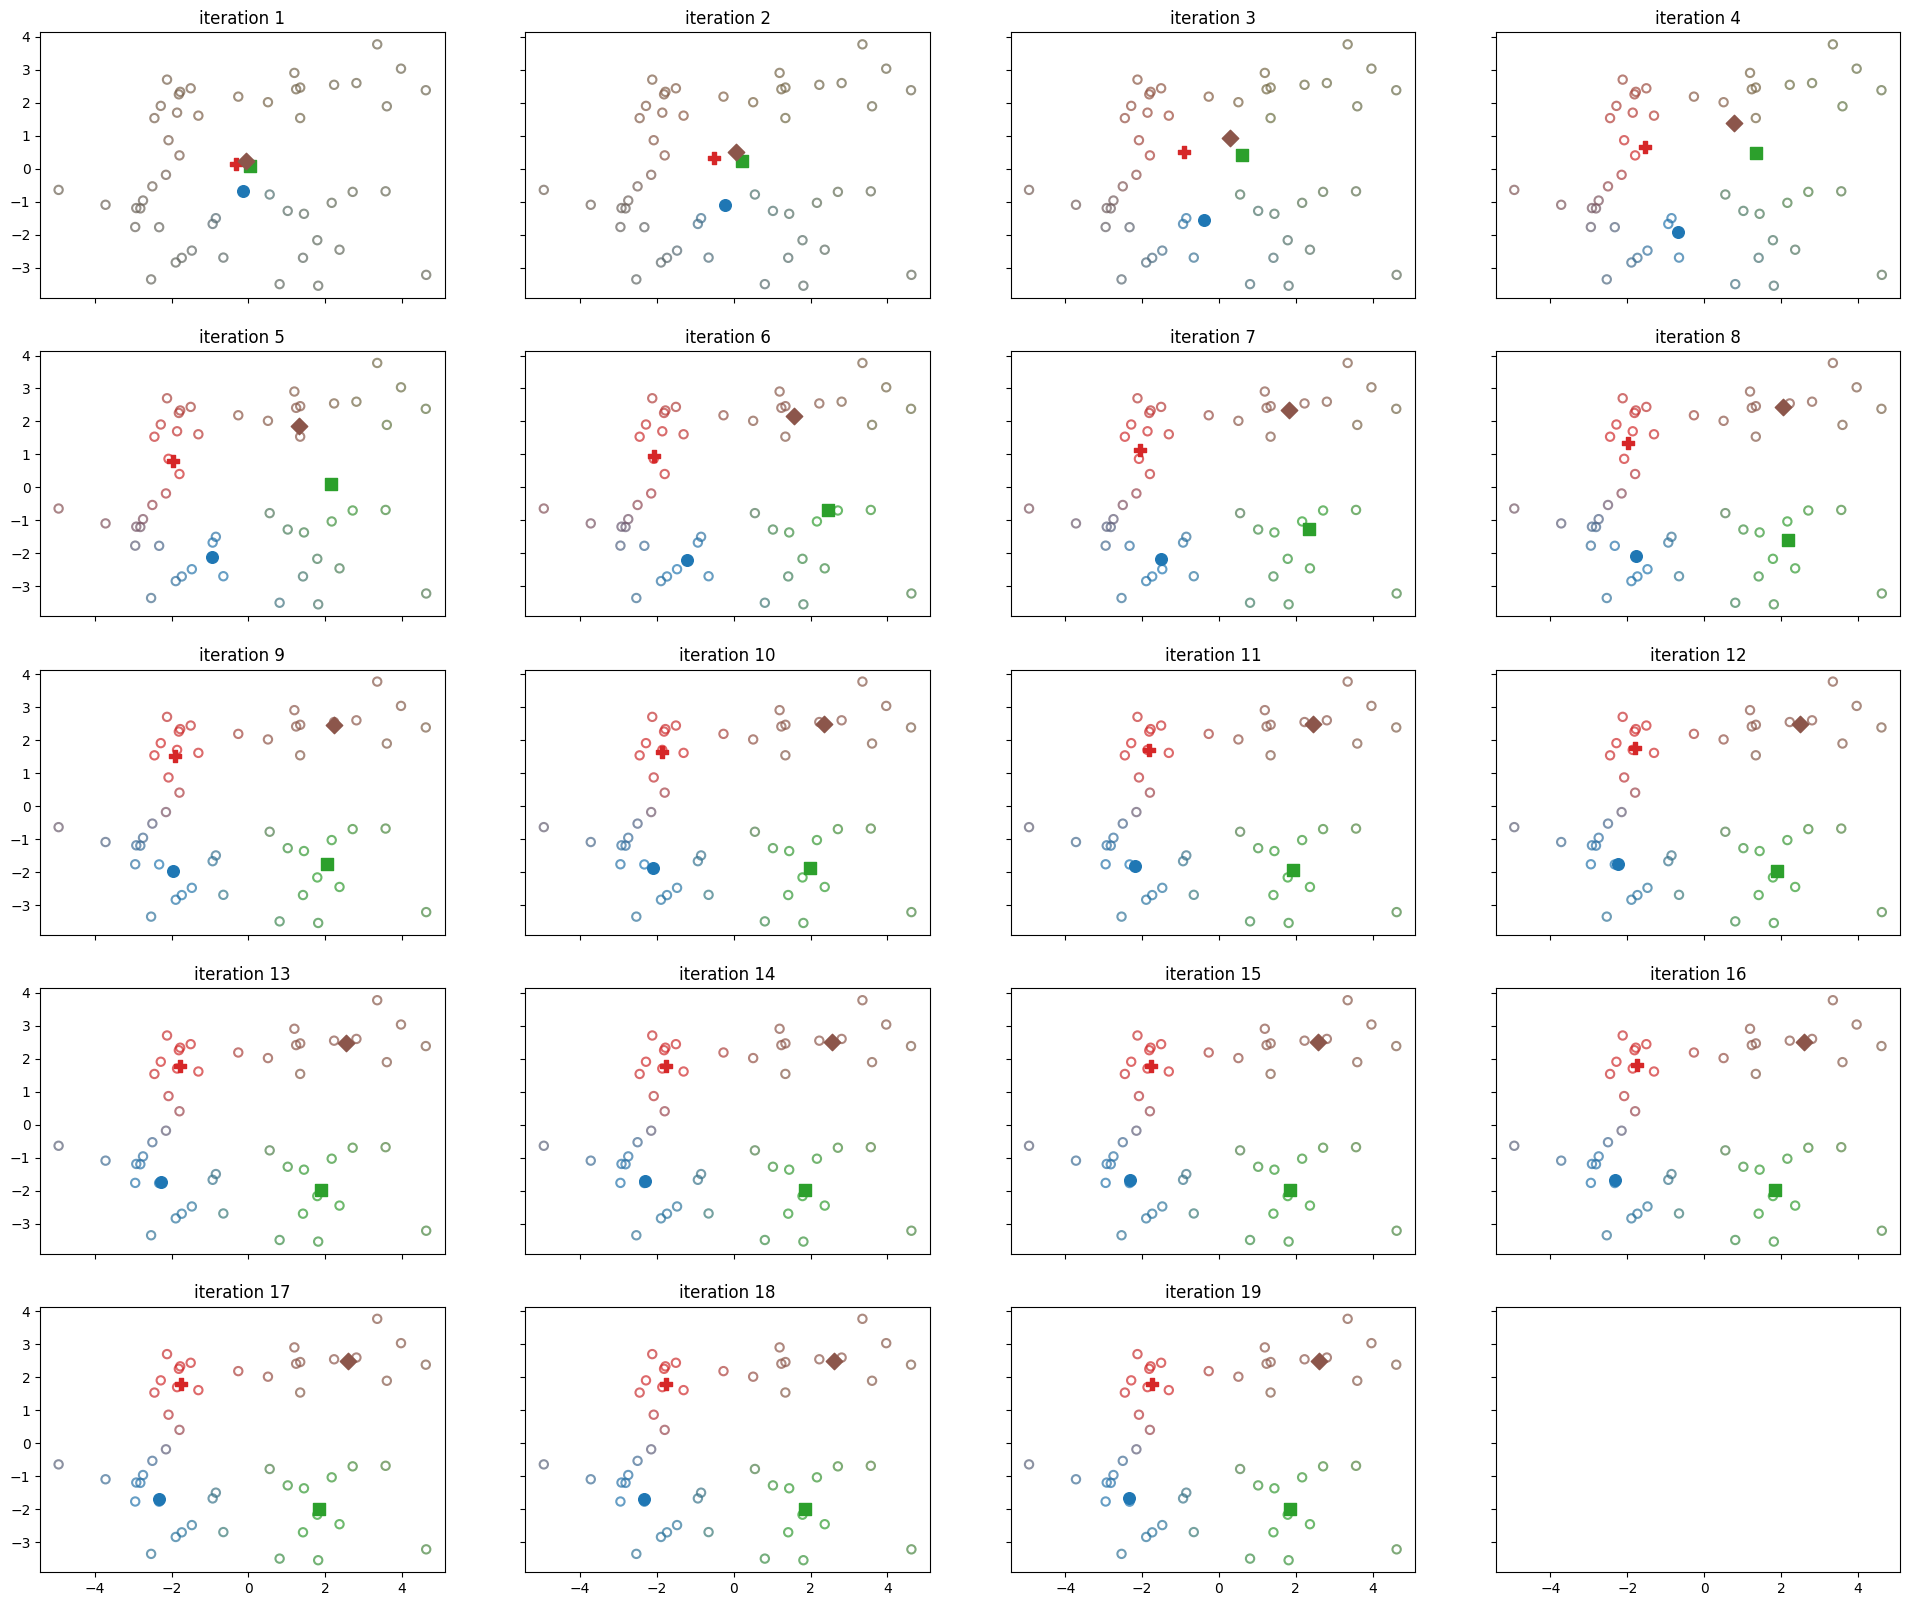

In [6]:

# Save scatter plots as one figure
col = 4
row = int(np.ceil(ite / col))
fig2, axs2 = plt.subplots(row, col, figsize=[6*col, 4*row], sharex=True, sharey=True)

for i in range(ite):
    r = i // col
    c = i % col

    sample_color = U_list[i] @ colors
    sample_color[sample_color > 1.0] = 1.0
    sample_color[sample_color < 0.0] = 0.0
    sample_color[:, 3] = 0.7

    axs2[r, c].set_title(f'iteration {i+1}')
    axs2[r, c].scatter(dataset_x[:, 0], dataset_x[:, 1], c=sample_color, marker=MarkerStyle('o', fillstyle='none'), alpha=0.7)

    for j, marker in enumerate(markers):
        axs2[r, c].scatter(mu_list[i][j, 0],
                           mu_list[i][j, 1],
                           marker=markers[j],
                           s=70,
                           c=colors[j:j+1])



Save images as a GIF file in which each frame represents one step of parameter update.

In [7]:
images[0].save('FCM.gif', save_all=True, append_images=images[1:], duration=500, loop=0)
print('GIF file has been saved as FCM.gif')

plt.close(fig2)



GIF file has been saved as FCM.gif
